# SD205 - TP1 : Non parametric spline regression
## REMI JAYLET

### Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


Bad key text.latex.unicode in file C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\remij\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotli

In [2]:
data = np.loadtxt('Motorcycledata.txt')[:,1:]

## Questions préliminaires

### QP-1

$ g = (I + \alpha K)^{-1}Y $

### QP-2

### QP-3

### QP-4

## Questions pratiques

### Question 1 - Données

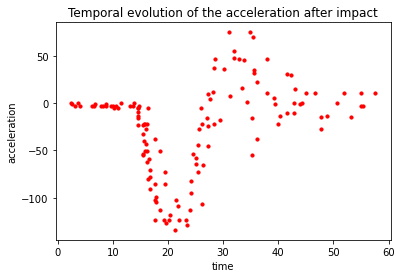

In [3]:
plt.scatter(data[:,0], data[:,1], s = 10, c = 'red')
plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()

Certain values have two mesures (coming from different captors). We shall take the mean of these 2 points for the rest of the TP.

In [4]:
# A MODIF !

data_temp= []
D = []

t_temp = 0
moy = 0
n = 1

for t,v in data:
    if (t == t_temp):
        moy += v
        n += 1
    else:
        D.append(n)
        data_temp.append(list((t_temp, moy/n)))
        moy = v
        n = 1
        t_temp = t
        
D.append(n)
D.pop(0)
data_temp.append(list((t_temp, moy/n)))
data_temp.pop(0)

[0, 0.0]

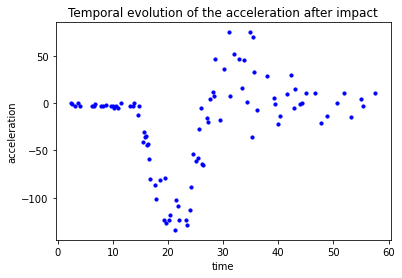

In [5]:
data = np.array(data_temp)
plt.scatter(data[:,0], data[:,1], s = 10, c = 'blue')
plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()

### Question 2 - Analyse exploratoire preliminaire

In [9]:
from sklearn.linear_model import LinearRegression

m = 50
t = data[:,0] #/60

temp = t.reshape((t.shape[0],1))

X = np.hstack([temp**k for k in range(1, m+1)])
Y = data[:,1]

reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)

Y_pred = np.poly1d(np.polyfit(t, Y, m))(t)

n = t.shape[0]
print("n = ",n)

n =  94


C:\Users\remij\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


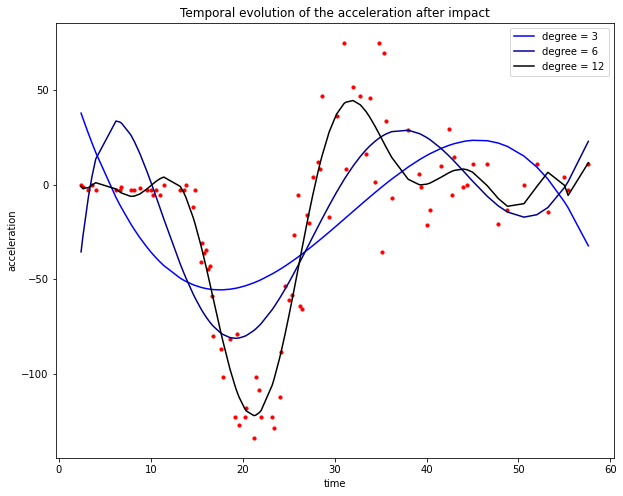

deg 3 R2 =  0.34
deg 6 R2 =  0.6
deg 12 R2 =  0.87


In [6]:
mymodel3 = np.poly1d(np.polyfit(data[:,0], data[:,1], 3))
mymodel6 = np.poly1d(np.polyfit(data[:,0], data[:,1], 6))
mymodel9 = np.poly1d(np.polyfit(data[:,0], data[:,1], 9))
mymodel12 = np.poly1d(np.polyfit(data[:,0], data[:,1], 12))

plt.figure(num=None, figsize=(10, 8))
plt.scatter(data[:,0], data[:,1], s = 10, c = 'red')
plt.plot(data[:,0], mymodel3(data[:,0]), color = 'blue', label = 'degree = 3')
plt.plot(data[:,0], mymodel6(data[:,0]), color = 'darkblue', label = 'degree = 6')
plt.plot(data[:,0], mymodel12(data[:,0]), color = 'black', label = 'degree = 12')
plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.legend()
plt.show()

print("deg 3 R2 = ", round(r2_score(data[:,1], mymodel3(data[:,0])),2))
print("deg 6 R2 = ", round(r2_score(data[:,1], mymodel6(data[:,0])),2))
print("deg 12 R2 = ", round(r2_score(data[:,1], mymodel12(data[:,0])),2))

There is no significant improvement in R2 after deg 12. 
We obtain a good biais but a low variance -> Overfitting problem.

The data is seperated in different regimes. A linear or polynomial over the whole domain is not at all appropriate. Let's work on a pievewise modelisation of the data.

### Question 3 - Regression par splines

In [12]:
n = len(data[:,0])
h = t[1:]-t[:n-1]
Q = np.zeros((n,n-2))

for j in range(n-2):
    Q[j,j] = 1/h[j]
    Q[j+1,j] = -1/h[j] - 1/h[j+1]
    Q[j+2,j] = 1/h[j+1]

R = np.zeros((n-2,n-2))

for j in range(n-2):
    R[j,j] = 1/3 * (h[j]+h[j+1])
    if j < n-3:
        R[j+1,j] = 1/6*h[j+1]
        R[j,j+1] = 1/6*h[j+1]

K = np.dot(np.dot(Q, np.linalg.inv(R)), Q.T)

for alpha = 10, R2 =  0.87
for alpha = 20, R2 =  0.87
for alpha = 30, R2 =  0.86


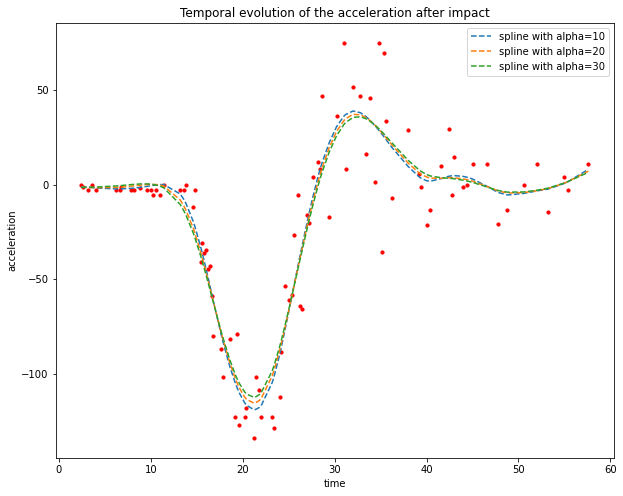

In [15]:
alphas = np.array([10,20,30])

plt.figure(figsize=(10, 8))
plt.scatter(data[:,0], data[:,1], s = 10, c = 'red')

for alpha in alphas:
    Y_pred = np.dot(np.linalg.inv(np.eye(n)+alpha*K), data[:,1])
    plt.plot(data[:,0], Y_pred,linestyle='--',label='spline with alpha='+str(alpha))
    print(f"for alpha = {alpha}, R2 =  {round(r2_score(data[:,1], Y_pred),2)}")


plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.legend()
plt.show()

### Question 4 - Validation croisée

In [21]:
def CV(alpha):
    A = np.linalg.inv(np.eye(n)+alpha*K)
    g = np.dot(A,data[:,1])
    return (1*n)*np.sum(((data[:,1]-g)/np.diag(np.eye(n)-A))**2)

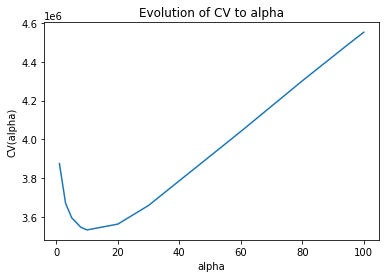

In [28]:
alphas = np.array([1,3,5,8,10,20,30,60,80,95,100])
res = [CV(a) for a in alphas]

plt.plot(alphas, res)
plt.title('Evolution of CV to alpha')
plt.ylabel('CV(alpha)')
plt.xlabel('alpha')
plt.show()

In [43]:
min_cv = 4000000
alpha = 0

for i in np.arange(3,25,0.1):
    cand = CV(i)
    if cand <= min_cv:
        min_cv = cand
        alpha = i

print(f"The minimum is {round(min_cv,2)} and is obtained for alpha = {round(alpha,2)}")

The minimum is 3529244.15 and is obtained for alpha = 12.2


### Question 5 - Validation croisée généralisée